<a href="https://colab.research.google.com/github/pipeton8/6.439-stats-comp-applications/blob/main/Assignments/3%20-%20Economics/6.439%20-%20Problem%20Set%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 3 - Statistics, Computation and Applications

(c) Felipe del Canto, October 2021
***
***

# Part 0 (Execute first!)

In [77]:
from IPython.display import clear_output

# Download files
!wget https://github.com/pipeton8/6.439-stats-comp-applications/raw/main/Assignments/databases/PS3_data.zip

# Unzip
!unzip -o PS3_data.zip
!rm *.z* -r __MACOSX

# Clear output
clear_output()

# Import packages
import datetime
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm, trange

import statsmodels.api         as sm
import statsmodels.formula.api as smf

In [96]:
def fit_npoly_trend(data=None, dep='', n=1, predict=False, residuals=False, sufix='', verbose=True):
  formula = dep + ' ~ ' + '+'.join(['t' + f'_{i:d}'*(i>1) for i in range(1,n+1)])
  
  ols = smf.ols(formula=formula, data=data, missing='drop', hasconst=False).fit()

  if verbose:
    print(ols_a.summary())

  if predict or residuals:
    predict_from_model(data, dep, ols, sufix, store_predict=predict, residuals=residuals)
  
  return ols

In [90]:
def predict_from_model(data, dep, model, sufix, store_predict=True, residuals=False):
  pred_var = dep + '_pred' + sufix
  data.loc[~data[dep].isna(), pred_var] = model.predict()

  if residuals:
    data['res'+sufix] = data[dep] - data[pred_var]

  if not store_predict:
    newcols = list(data.columns).remove(pred_var)
    data = data[newcols]

  return None

# Part 1

## Problem 3.1: The Manua Loa $\text{CO}_2$ concentration.

In [78]:
# Write column names
old_colnames = ['year', 'month', 'date_excel', 'date_num', 'co2',
            'co2_season_adj', # season adjusted using substracting 4-harmonic fit
            'co2_fit',        # cubic spline
            'co2_season_adj_fit', # fit substracting season adj
            'co2_filled',         # filled with co2_fit
            'co2_season_adj_filled'] # season adjusted column filled with co2_season_adj_fit

# Load data
co2_data = pd.read_csv('CO2Data.csv',index_col=False, names=old_colnames, skiprows=59)

# Replace missing values with NANs
missing_value_code = -99.99
co2_data.replace(to_replace = missing_value_code, value=pd.NA, inplace=True)

# Create date variable
co2_data['date'] = co2_data['year'].apply(str) + "/" + co2_data['month']. apply(str) + "/15"
co2_data['date'] = pd.to_datetime(co2_data['date'], format="%Y/%m/%d")

# Delete date_excel and date_num columns
colnames = ['date'] + [colname for colname in old_colnames if colname.find("date") == -1]
co2_data = co2_data[colnames]

In [79]:
co2_data.describe(include='all', datetime_is_numeric=True)

,date,year,month,co2,co2_season_adj,co2_fit,co2_season_adj_fit,co2_filled,co2_season_adj_filled
count,706,706.00,706.00,698.00,698.00,703.00,703.00,703.00,703.00
mean,1987-07-31 06:21:24.985835712,1987.08,6.51,352.00,351.99,351.76,351.74,351.76,351.75
min,1958-03-15 00:00:00,1958.00,1.00,313.21,314.42,312.44,314.90,312.44,314.42
25%,1972-11-22 12:00:00,1972.00,4.00,328.48,328.93,328.32,328.19,328.11,328.28
50%,1987-07-30 12:00:00,1987.00,7.00,349.53,349.54,349.30,348.85,348.96,348.76
75%,2002-04-07 06:00:00,2002.00,9.75,372.76,372.27,372.24,372.09,372.28,372.15
max,2016-12-15 00:00:00,2016.00,12.00,407.65,404.73,407.23,404.62,407.65,404.73
std,NaN,17.00,3.45,25.96,25.87,26.02,25.94,26.02,25.94


### (a)

#### Fit and predict linear model with residuals 

In [97]:
fit_kwargs_a = {'data'      : co2_data,
                'dep'       : 'co2',
                'n'         : 1,
                'predict'   : True,
                'residuals' : True,
                'sufix'     : '_a'}

ols_a = fit_npoly_trend(**fit_kwargs_a)

                                 OLS Regression Results                                
Dep. Variable:                    co2   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.885e+06
Date:                Tue, 19 Oct 2021   Prob (F-statistic):                        0.00
Time:                        19:49:56   Log-Likelihood:                         -1936.2
No. Observations:                 698   AIC:                                      3876.
Df Residuals:                     696   BIC:                                      3885.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Plot fit

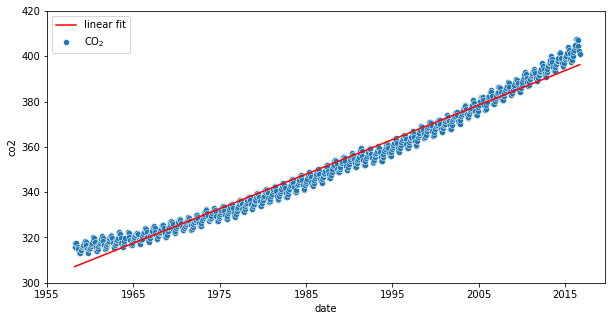

In [98]:
# Initialize figure
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

# Draw scatterplot and fit
sns.scatterplot(data=co2_data, x='date', y='co2', label=r'CO$_2$', ax=ax)
sns.lineplot(data=co2_data, x='date', y='co2_pred', label='linear fit', color = 'red', ax=ax)

# Set xticks and yticks
xticks = [f'{1955+10*k:d}' for k in range(7)]
yticks = [300 + 20*k for k in range(7)]

plt.xticks(pd.to_datetime(xticks), xticks)
plt.yticks(yticks)

# Set legend location
plt.legend(loc='upper left')

# Show figure
fig.show()

### (b)

### (c)

### (d)

### (e)

## Problem 3.1: BPP Data Analysis

### (a)

### (b)

### (c)

### (d)

### (e)

### (f)